In [19]:
#import necessary libraries
import pandas as pd
import numpy as np
import json

In [20]:
data = []

#Open the JSON file
with open('News_Category_Dataset.json', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            continue   # skip bad lines

#Convert the list of dictionaries into dataframe
huffpost = pd.DataFrame(data)
huffpost.head()

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [21]:
#Load dataset
from datasets import load_dataset
ag_news = load_dataset("sh0416/ag_news")
ag_news

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 7600
    })
})

In [22]:
huffpost['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS'], dtype=object)

In [23]:
huffpost['category'].value_counts()


,count
category,
POLITICS,9134
ENTERTAINMENT,3544
WORLD NEWS,2159
QUEER VOICES,1365
COMEDY,999
BLACK VOICES,958
HEALTHY LIVING,901
WOMEN,749
PARENTS,744


In [24]:
#Categories selected to be included in new dataframe
selected_categories=['ENTERTAINMENT', 'CRIME', 'HEALTHY LIVING', 'POLITICS']

In [25]:
huffpost=huffpost[huffpost['category'].isin(selected_categories)]
huffpost

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT
...,...,...,...,...,...,...
25862,"“Of course I do not regret the Bond days,"" he ...",Roger Moore Came To Hate The Way Society Glori...,2017-05-23,https://www.huffingtonpost.com/entry/roger-moo...,Maxwell Strachan,ENTERTAINMENT
25863,"""Broken,"" the singer tweeted soon after the tr...",Ariana Grande Tour Dates Canceled Following Ma...,2017-05-23,https://www.huffingtonpost.com/entry/ariana-gr...,Sara Boboltz,ENTERTAINMENT
25866,"Over 5,000 voters will be able to vote in a ru...",Georgia Would Have Blocked Thousands Of People...,2017-05-23,https://www.huffingtonpost.com/entry/georgia-6...,Sam Levine,POLITICS
25867,No president has ever tried to do this.,Trump's Budget Would Cut Planned Parenthood Ou...,2017-05-23,https://www.huffingtonpost.com/entry/planned-p...,Laura Bassett,POLITICS


In [26]:
huffpost.drop(columns=['date', 'link', 'authors'], inplace=True)

In [27]:
huffpost=huffpost.rename(columns={'short_description': 'description', 'headline':'title', 'category':'label'})
huffpost

,description,title,label
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT
...,...,...,...
25862,"“Of course I do not regret the Bond days,"" he ...",Roger Moore Came To Hate The Way Society Glori...,ENTERTAINMENT
25863,"""Broken,"" the singer tweeted soon after the tr...",Ariana Grande Tour Dates Canceled Following Ma...,ENTERTAINMENT
25866,"Over 5,000 voters will be able to vote in a ru...",Georgia Would Have Blocked Thousands Of People...,POLITICS
25867,No president has ever tried to do this.,Trump's Budget Would Cut Planned Parenthood Ou...,POLITICS


In [28]:
ag_news=pd.DataFrame(ag_news['train'])
ag_news

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [29]:
df=pd.concat([huffpost, ag_news], ignore_index=True)
df

,description,title,label
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT
...,...,...,...
133965,KARACHI (Reuters) - Pakistani President Perve...,Pakistan's Musharraf Says Won't Quit as Army C...,1
133966,Red Sox general manager Theo Epstein acknowled...,Renteria signing a top-shelf deal,2
133967,The Miami Dolphins will put their courtship of...,Saban not going to Dolphins yet,2
133968,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,Today's NFL games,2


In [30]:
!pip install nlpaug


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 937.0 kB/s eta 0:00:00


In [31]:
df['title_description']=df['title']+' '+df['description']

In [32]:
df.drop(columns=['title', 'description'], inplace=True)

In [33]:
df

,label,title_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
133965,1,Pakistan's Musharraf Says Won't Quit as Army C...
133966,2,Renteria signing a top-shelf deal Red Sox gene...
133967,2,Saban not going to Dolphins yet The Miami Dolp...
133968,2,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [46]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to string (if not already)
df['label'] = df['label'].astype(str)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
df['label'] = le.fit_transform(df['label'])

In [49]:
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet')

target_size = 30000

for label in df['label'].unique():
    df_minority = df[df['label'] == label]

    if len(df_minority) == 0:
        print(f"Skipping label {label} (no samples)")
        continue

    n_needed = target_size - len(df_minority)

    if n_needed <= 0:
        continue

    no_of_aug = int(np.ceil(n_needed / len(df_minority)))

    augmented_rows = []

    for _ in range(no_of_aug):
        for _, row in df_minority.iterrows():
            augmented_rows.append({
                "label": label,
                "title_description": aug.augment(row["title_description"])
            })

    df_aug = pd.DataFrame(augmented_rows).sample(
        n=n_needed, random_state=42
    )

    df = pd.concat([df, df_aug], ignore_index=True)


In [48]:
import nltk

# Download required resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # sometimes required for tokenization
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
  if isinstance(text, str):
    words = text.split()
  else:
        # If it’s already a list, use it as-is
    words = text
  cleaned_text = []
  for w in words:
    w_lower = w.lower()  # lowercase
    if w_lower not in stop_words:  # remove stopwords
      w_lemma = lemmatizer.lemmatize(w_lower)  # lemmatize
      cleaned_text.append(w_lemma)
  return " ".join(cleaned_text)  # return cleaned text

print(df['title_description'].apply(preprocess))


0         2 mass shooting texas last week, 1 tv left hus...
1         smith join diplo nicky jam 2018 world cup's of...
2         hugh grant marries first time age 57 actor lon...
3         jim carrey blast 'castrato' adam schiff democr...
4         julianna margulies us donald trump poop bag pi...
                                ...                        
239995    the sleep phase where you dream may make you l...
239996    typical adults eat enough salt to damage heart...
239997    the hunting for the significance of life may b...
239998    quadruplet things psychologists perform every ...
239999    the power of dads: why dads need to invest in ...
Name: title_description, Length: 240000, dtype: object


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['cleaned_text'] = df['title_description'].apply(preprocess)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),     # unigrams + bigrams
    max_features=20000,
    min_df=3,
    max_df=0.95,
    stop_words='english'
)

X = vectorizer.fit_transform(df['cleaned_text'])




In [52]:
print(df['label'].unique())
print(df['label'].dtype)
print(df['label'].value_counts())

y=df['label']



[4 5 7 6 2 3 1 0]
int64
label
4    30000
5    30000
7    30000
6    30000
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


In [53]:

def train_test_split1(X, y, test_size=0.2):
  train_size=int(X.shape[0]*(1-test_size))
  X_train=X[:train_size]
  y_train=y[:train_size]

  X_test=X[train_size:]
  y_test=y[train_size:]

  return X_train, X_test, y_train, y_test

In [54]:

import numpy as np
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [55]:
import matplotlib.pyplot as plt
def gradient_descent_weighted(X_train, y_train, X_val=None, y_val=None,
                              lr=0.01, epochs=20, batch_size=1024, lambda_reg=1e-5):

    n_features = X_train.shape[1]
    n_classes = y_train.shape[1]
    n_samples = X_train.shape[0]

    # Initialize weights and bias
    w = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    # Compute class weights
    class_counts = np.sum(y_train, axis=0)
    class_weights = np.max(class_counts) / class_counts  # array of size n_classes

    train_acc_history = []
    val_acc_history = []

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        # Mini-batch gradient descent
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Forward pass
            z = X_batch.dot(w) + b
            exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
            y_pred = exp_z / np.sum(exp_z, axis=1, keepdims=True)  # softmax

            # Compute weighted gradient
            weighted_error = (y_pred - y_batch) * class_weights  # broadcasting
            dw = X_batch.T.dot(weighted_error) / X_batch.shape[0]
            dw += lambda_reg * w  # L2 regularization
            db = np.sum(weighted_error, axis=0, keepdims=True) / X_batch.shape[0]

            # Update weights
            w -= lr * dw
            b -= lr * db

        # Compute accuracy
        y_train_pred = np.argmax(X_train.dot(w) + b, axis=1)
        y_true_train = np.argmax(y_train, axis=1)
        train_acc = np.mean(y_train_pred == y_true_train)
        train_acc_history.append(train_acc)

        if X_val is not None and y_val is not None:
            y_val_pred = np.argmax(X_val.dot(w) + b, axis=1)
            y_true_val = np.argmax(y_val, axis=1)
            val_acc = np.mean(y_val_pred == y_true_val)
            val_acc_history.append(val_acc)
            print(f"  Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"  Train Acc: {train_acc:.4f}")
    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, train_acc_history, label="Training Accuracy")

    if val_acc_history:
        plt.plot(epochs_range, val_acc_history, label="Validation Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy (Logistic Regression)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return w, b, train_acc_history, val_acc_history
def predict(X, w, b):
    z = X.dot(w) + b
    probs = np.exp(z - np.max(z, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [56]:
print(X.shape[0] )
print(y.shape[0])


240000
240000


In [57]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test=train_test_split1(X, y)



Epoch 1/80
  Train Acc: 0.5335 | Val Acc: 0.5260
Epoch 2/80
  Train Acc: 0.6223 | Val Acc: 0.6144
Epoch 3/80
  Train Acc: 0.6820 | Val Acc: 0.6757
Epoch 4/80
  Train Acc: 0.7235 | Val Acc: 0.7177
Epoch 5/80
  Train Acc: 0.7513 | Val Acc: 0.7456
Epoch 6/80
  Train Acc: 0.7711 | Val Acc: 0.7664
Epoch 7/80
  Train Acc: 0.7858 | Val Acc: 0.7807
Epoch 8/80
  Train Acc: 0.7953 | Val Acc: 0.7909
Epoch 9/80
  Train Acc: 0.8024 | Val Acc: 0.7983
Epoch 10/80
  Train Acc: 0.8073 | Val Acc: 0.8038
Epoch 11/80
  Train Acc: 0.8113 | Val Acc: 0.8078
Epoch 12/80
  Train Acc: 0.8141 | Val Acc: 0.8113
Epoch 13/80
  Train Acc: 0.8164 | Val Acc: 0.8134
Epoch 14/80
  Train Acc: 0.8182 | Val Acc: 0.8151
Epoch 15/80
  Train Acc: 0.8199 | Val Acc: 0.8162
Epoch 16/80
  Train Acc: 0.8212 | Val Acc: 0.8173
Epoch 17/80
  Train Acc: 0.8223 | Val Acc: 0.8183
Epoch 18/80
  Train Acc: 0.8230 | Val Acc: 0.8191
Epoch 19/80
  Train Acc: 0.8238 | Val Acc: 0.8200
Epoch 20/80
  Train Acc: 0.8245 | Val Acc: 0.8207
Epoch 21/

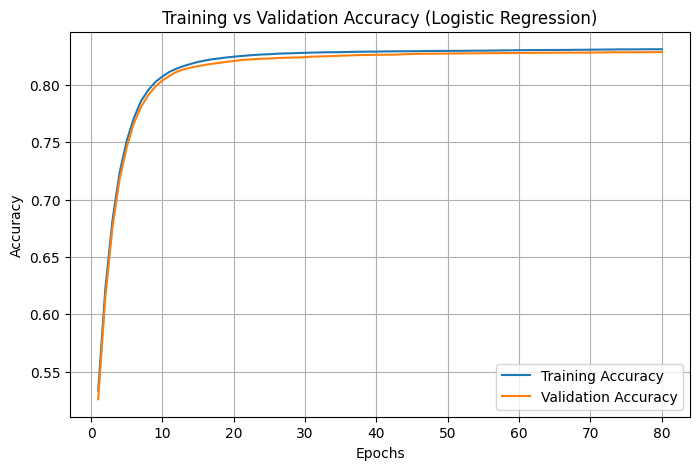

In [58]:
num_classes = len(np.unique(y_train))

num_classes = len(np.unique(y_train))

# Convert to integers if not already
y_train_int = y_train.astype(int) if not isinstance(y_train, np.ndarray) else y_train
y_test_int  = y_test.astype(int)  if not isinstance(y_test, np.ndarray) else y_test

# One-hot encoding
y_train_onehot = np.eye(num_classes)[y_train_int]  # shape (n_samples, num_classes)
y_test_onehot  = np.eye(num_classes)[y_test_int]

#lr - 0.01 (overall accuracy 0.78)
#lr - 0.05(0.85)
#batch-size 2048 0.58

w, b, train_acc, val_acc = gradient_descent_weighted(
    X_train, y_train_onehot,
    X_val=X_test, y_val=y_test_onehot,
    lr=0.03,
    epochs=80,
    batch_size=1024
)


In [59]:
def predict(X, w, b):
    z = X.dot(w) + b            # (n_samples, n_classes)
    probs = softmax(z)          # probabilities
    y_pred = np.argmax(probs, axis=1)  # class index
    return y_pred
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = predict(X_test, w, b)
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      6058
           1       0.86      0.94      0.90      6088
           2       0.82      0.79      0.81      6029
           3       0.85      0.74      0.79      5848
           4       0.81      0.94      0.87      6078
           5       0.80      0.82      0.81      5822
           6       0.77      0.88      0.82      6014
           7       0.84      0.70      0.76      6063

    accuracy                           0.83     48000
   macro avg       0.83      0.83      0.83     48000
weighted avg       0.83      0.83      0.83     48000

